## Import the scripts 

In [16]:
%run Implied_Volatility.ipynb
%run Option_Greeks.ipynb

## Draw the Impied Volatility Graph of 0130 and 0131

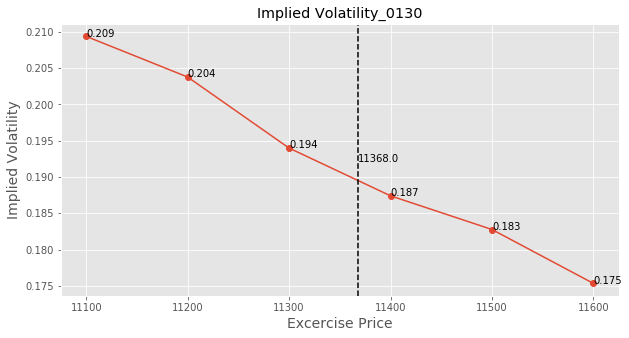

In [2]:
date_ = '0130'
S = todayStockPrice(date = date_)
list_StockPrices = moneyness_list(S, gapType = "month", gapNum = 3) # only 3 OTM price on monthly basis

# Split the df to df_call and df_put
df = df_generate(product = 'TXO', date = date_ )
df_put = df[df.買賣權 == 'Put'].reset_index(drop=True)
df_call = df[df.買賣權 == 'Call'].reset_index(drop=True)

# append the IV 
df_put = Flag_Moneyness(df_put, S = S, code = 'Put')
list_IV, categoryNAPut = IV_List(df = df_put, Stock = S, d = date_ , flag = 'Put')
df_put["IV"] = list_IV

df_call = Flag_Moneyness(df_call, S = S, code = 'Call')
list_IV, categoryNACall = IV_List(df = df_call, Stock = S, d = date_ , flag = 'Call')
df_call["IV"] = list_IV

# Combine call and put with only OTM 
df_OTM = combine_OTM(df_call, df_put, list_StockPrices)
plot_IV(df = df_OTM, S = S, date = date_)


In [4]:
df_OTM

,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,最後成交價,結算價,漲跌價,...,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,Moneyness,IV
15,TXO,202002,11200,Put,110,118,69,93,93.0,▼-49,...,4913,6926,11839,11550,90,94,200,10.5,OTM,0.192613
16,TXO,202002,11300,Put,138,148,90,119,119.0,▼-57,...,5041,5414,10455,11182,116,120,232,13.5,OTM,0.184521
17,TXO,202002,11400,Put,172,186,116,151,151.0,▼-65,...,2886,7480,10366,13800,150,151,280,17.5,OTM,0.17615
18,TXO,202002,11500,Call,173,216,142,160,160.0,▲+23,...,2310,4649,6959,3333,155,161,690,109,OTM,0.166774
19,TXO,202002,11600,Call,116,156,97,110,110.0,▲+13,...,3240,6478,9718,4378,109,111,595,74,OTM,0.160572
20,TXO,202002,11700,Call,82,108,63,72,72.0,▲+7,...,3963,8048,12011,6352,71,72,550,47.5,OTM,0.154079


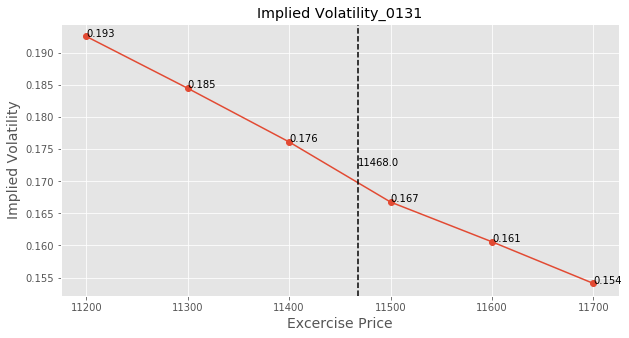

In [17]:
date_ = '0131'
S = todayStockPrice(date = date_)
list_StockPrices = moneyness_list(S, gapType = "month", gapNum = 3) # only 3 OTM price on monthly basis

# Split the df to df_call and df_put
df = df_generate(product = 'TXO', date = date_ )
df_put = df[df.買賣權 == 'Put'].reset_index(drop=True)
df_call = df[df.買賣權 == 'Call'].reset_index(drop=True)

# append the IV 
df_put = Flag_Moneyness(df_put, S = S, code = 'Put')
list_IV, categoryNAPut = IV_List(df = df_put, Stock = S, d = date_ , flag = 'Put')
df_put["IV"] = list_IV

df_call = Flag_Moneyness(df_call, S = S, code = 'Call')
list_IV, categoryNACall = IV_List(df = df_call, Stock = S, d = date_ , flag = 'Call')
df_call["IV"] = list_IV

# Combine call and put with only OTM 
df_OTM = combine_OTM(df_call, df_put, list_StockPrices)
plot_IV(df = df_OTM, S = S, date = date_)


In [ ]:
s = 11368
k = 11200
exp_date = '20200219'
eval_date = '20200130'
rf = 0.0
vol = 0.203777
div = 0.0
right = 'Put'

opt = Option(s=s, k=k, eval_date=eval_date, exp_date=exp_date, rf=rf, vol=vol, right=right,
             div = div)
greeks = opt.get_greeks()


In [ ]:
opt.describe_option()

In [18]:
d_option1 = {'現貨價格': '11386', '到期日': '20200219', '買賣權': 'Call', '履約價': '11400', 
             '今日': '20200130', '部位': '-1', '結算價': '192.02', 'IV': '0.193986'}
d_option2 = {'現貨價格': '11386', '到期日': '20200219', '買賣權': 'Put', '履約價': '11200', 
             '今日': '20200130', '部位': '-1', '結算價': '142.299', 'IV': '0.193986'}

df_options = pd.DataFrame([d_option1, d_option2])
opt_strat = Options_strategy(df_options)
greeks_strat = opt_strat.get_greeks()

1
[-465.68100000000004, -365.68100000000004, -265.68100000000004, -165.681, -65.68100000000001, 34.31900000000002, 134.31900000000002, 234.31900000000002, 334.319, 334.319, 334.319, 234.31900000000002, 134.31900000000002, 34.31900000000002, -65.68099999999998, -165.681, -265.68100000000004, -365.68100000000004, -465.68100000000004, -565.681]


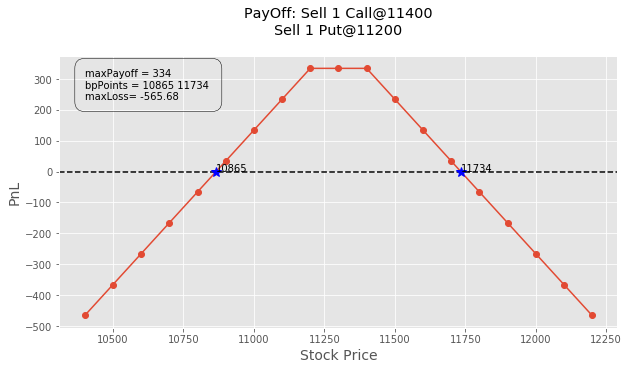

In [19]:
pnl = opt_strat.portfolio_payoff()